# Milestone 1

# Tableau Link

URL Dashboard Tableau: https://public.tableau.com/views/h8dsft_Milestone1_Reza-Muhammad-Rhafi/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Perkenalan

In [ ]:
'''
=================================================
Milestone 1

Nama  : Reza Muhammad Rhafi
Batch : HCK-023

Milestones 1 ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.
'''

## Bussiness Understanding

### Identifikasi Masalah

#### Latar Belakang

Gaya hidup mahasiswa merupakan salah satu aspek penting yang dapat memengaruhi keberhasilan akademik mereka. Berbagai aktivitas harian, seperti waktu belajar, partisipasi dalam kegiatan ekstrakurikuler, pola tidur, interaksi sosial, hingga kebiasaan olahraga, secara langsung maupun tidak langsung dapat berdampak pada performa akademik yang diukur melalui Indeks Prestasi Kumulatif (GPA). Pemahaman mendalam mengenai pola-pola ini dapat memberikan wawasan berharga untuk meningkatkan keseimbangan antara aktivitas akademik dan non-akademik, serta mendukung pengelolaan stres yang lebih baik.

#### SMART

specific = mengurangi stress level pada students tanpa mengurangi GPA students secara signifikan

measurable = melakukan pengurangan jam belajar perhari dan/atau penambahan jam tidur perhari agar rata-rata stress level dari 51% menjadi 30%

Achievable = berdasarkan dataset, menurunkan stress level dengan cara menurunkan jam belajar/meningkatkan jam tidur/menurunkan aktivitas fisik itu dapat tercapai

Relevant = mengurangi level stress students sangat dibutuhkan untuk meningkatkan kesehatan mental dan produktivitas mereka agar dapat mendukung pencapaian akademik

time bound = menyelesaikan projek ini dalam 3 bulan kedepan, untuk menurunkan stress level dengan mengubah lifestyle students


problem statement = terdapat 51% students mengalami high level stress akibat tekanan akademik yang dapat berdampak negatif terhadap kesehatan mental dan fisik mereka. level stress yang tinggi, jika tidak diatasi dapat menurunkan produktivitas dan merusak keseimbangan gaya hidup mereka. terdapat faktor-faktor yang dapat mempengaruhi level stress students seperti jam belajar, durasi tidur dan aktivitas fisik. tujuan dilakukan projek ini adalah untuk mencari strategi yang efektif untuk mengurangi level stress students tanpa menurunkan nilai akademik mereka. dengan melihat pola gaya hidup dan level stress yang ada pada dataset, dapat diberikan saran perubahan gaya hidup yang dapat mengurangi level stress rata-rata dari 51% menjadi 30% dalam waktu 3 bulan dengan menemukan hubungan antara pengurangan jam belajar, penambahan jam tidur dan perubaha waktu aktivitas fisik.

Referensi : 
https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset

#### Penjabaran 5W+1H

- apakah ada hubungan antara jam tidur per hari dan level stres siswa? 
- bagaimana pengaruh aktivitas fisik terhadap level stress siswa ? 
- apakah siswa dengan jam belajar sedikit memiliki level stress yang rendah dibanding dengan siswa dengan jam belajar yang lebih banyak? 
- Apakah jam belajar per hari dapat mempengaruhi nilai GPA?
- Bagaimana durasi tidur, durasi belajar, dan aktivitas fisik dapat memengaruhi level stres siswa?  
- Apakah siswa dengan level stress tinggi memiliki nilai GPA yang tinggi ? 

## Data Loading

In [2]:
import pandas as pd
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import numpy as np

C:\Users\Vexen\AppData\Local\Temp\ipykernel_11208\3877638522.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


### Data Exploration

In [3]:
df = pd.read_csv('dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


terdapat 2000 student id dengan level stress yang berbeda-beda. level stress tersebut terkait dengan jam tidur, jam ektrakurikuler, jam tidur, jam bersosial, dan waktu aktifitas fisik. keseimbangan yang tidak sesuai dapat mempengaruhi nilai GPA student. 

## Data Cleaning

menambahkan kolom untuk sorting value antara low,moderate,dan high agar menjadi terurut

In [4]:
category_mapping = {'High': 3, 'Moderate': 2, 'Low': 1}
df['Stress_Level_Num'] = df['Stress_Level'].map(category_mapping)

menambahkan kolom kategori jam belajar guna untuk melakukan analisa terhadap jam belajar

In [5]:
conditions = [
    (df['Study_Hours_Per_Day'] < 7),  # Condition for '1-6 hours'
    (df['Study_Hours_Per_Day'] >= 7) & (df['Study_Hours_Per_Day'] < 9),  # Condition for '7-8 hours'
    (df['Study_Hours_Per_Day'] >= 9)  # Condition for '+9 hours'
]

# Define the corresponding labels for each condition
labels = ['1-6 hours', '7-8 hours', '+9 hours']

# Use np.select to assign labels based on the conditions
df['Study_Hours_Category'] = np.select(conditions, labels, default='Unknown')

In [6]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Stress_Level_Num,Study_Hours_Category
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,1-6 hours
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,1-6 hours
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,1-6 hours
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,1-6 hours
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,7-8 hours
...,...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate,2,1-6 hours
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate,2,1-6 hours
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate,2,1-6 hours
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High,3,7-8 hours


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
 8   Stress_Level_Num                 2000 non-null   int64  
 9   Study_Hours_Category             2000 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 156.4+ KB


In [8]:
df.to_csv('dataset_clean.csv')

## Analisis dan perhitungan

### Data Visual

#### 1. apakah ada hubungan antara jam tidur per hari dan level stres siswa? 

pertama dilakukan mencari tau apakah terdapat hubungan antara rata-rata jam tidur per hari dengan level stress yang dialami siswa.

In [9]:
df1 = df[['Sleep_Hours_Per_Day','Stress_Level']].groupby(by=['Stress_Level']).mean()
df1

,Sleep_Hours_Per_Day
Stress_Level,
High,7.046453
Low,8.063973
Moderate,7.947626


<Axes: xlabel='Stress_Level'>

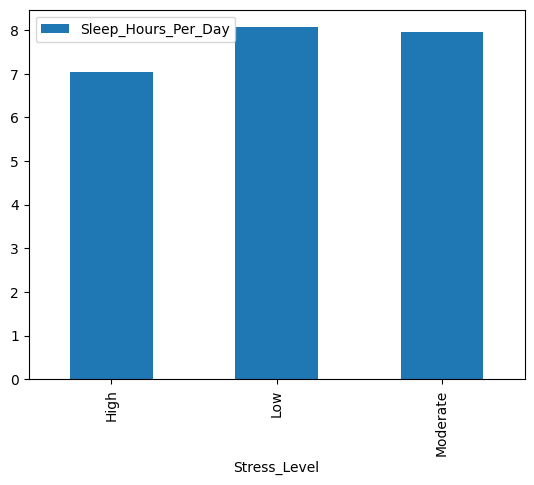

In [10]:
df1.plot(kind='bar')

jam tidur siswa yang memiliki level stress low dan moderate memiliki rata-rata jam tidur 8 jam sedangkan untuk level stress high memiliki rata-rata jam tidur 7 jam.

#### 2. bagaimana pengaruh aktivitas fisik terhadap level stress siswa ?

kemudian dilihat apakah waktu melakukan aktifitas fisik per hari mempengaruhi level stress siswa

In [11]:
df2 = df[['Physical_Activity_Hours_Per_Day','Stress_Level']].groupby(by=['Stress_Level']).mean()
df2

,Physical_Activity_Hours_Per_Day
Stress_Level,
High,3.960933
Low,5.581818
Moderate,4.336795


<Axes: xlabel='Stress_Level'>

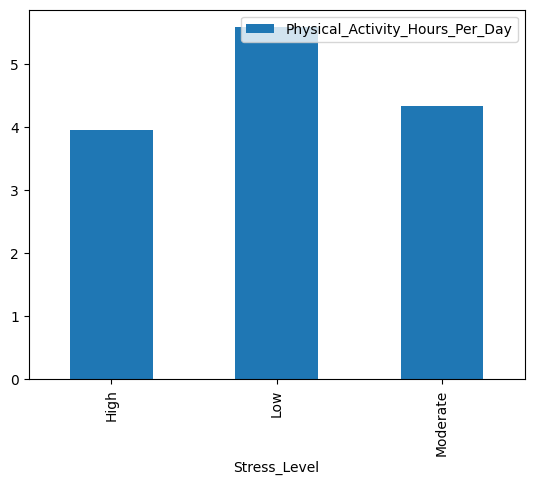

In [12]:
df2.plot(kind='bar')

aktifitas fisik pada siswa yang memiliki level stress low melakukan aktifitas fisik rata-rata berada pada 5,5 jam sedangkan siswa yang memiliki stress moderate dan high memiliki rata-rata melakukan aktifitas fisik selama 4 jam

#### 3. apakah siswa dengan jam belajar sedikit memiliki level stress yang rendah dibanding dengan siswa dengan jam belajar yang lebih banyak?

step berikutnya dilakukan perbandingan tingkat level stress berdasarkan kategori jam belajar

In [13]:
k = df.groupby("Stress_Level")["Study_Hours_Category"].value_counts().reset_index(name="Count")
k

,Stress_Level,Study_Hours_Category,Count
0,High,7-8 hours,456
1,High,+9 hours,400
2,High,1-6 hours,173
3,Low,1-6 hours,297
4,Moderate,7-8 hours,347
5,Moderate,1-6 hours,327


In [14]:
fig = px.bar(
    k,
    x="Stress_Level",  # Stress levels on x-axis
    y="Count",  # Count values on y-axis
    color="Study_Hours_Category",  # Group bars by study hours category
    barmode="group",  # Group bars side-by-side
    title="Study Hours Category by Stress Level",
    labels={"Count": "Number of Students", "Stress_Level": "Stress Level"}
)

# Show the plot
fig.show()

berdasarkan chart, stress level siswa dengan tingkat high memiliki jam belajar yang banyak sedangkan siswa yang memiliki jam belajar yang sedikit level stress nya lebih rendah.

#### 4. Apakah jam belajar per hari dapat mempengaruhi nilai GPA?

kemudian dilihat pengaruh jam belajar terhadap nilai GPA siswa

In [15]:
df4 = df[['Study_Hours_Per_Day','GPA']].sort_values('GPA')
df4

,Study_Hours_Per_Day,GPA
764,5.5,2.24
1574,5.3,2.25
331,5.1,2.25
377,5.7,2.28
1172,5.5,2.30
...,...,...
1588,9.8,3.90
1454,9.4,3.91
870,9.7,3.92
1229,9.8,3.93


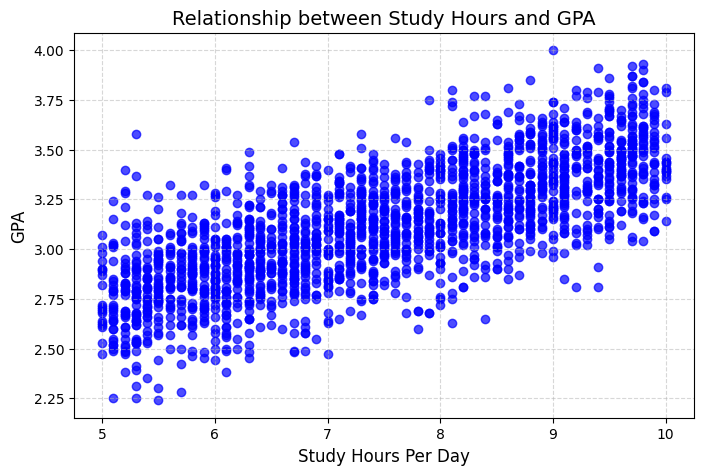

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Study_Hours_Per_Day'], df['GPA'], alpha=0.7, color='b')

# Menambahkan judul dan label
plt.title('Relationship between Study Hours and GPA', fontsize=14)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('GPA', fontsize=12)

# Menampilkan grid untuk membantu pembacaan data
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

berdasarkan chart, semakin tinggi jam belajar maka semakin tinggi pula GPA yang didapatnya sehingga jam belajar sangat mempengaruhi nilai GPA siswa.

### Stat. deskriptif

#### Correlation Analysis Pearson

Bagaimana durasi tidur, durasi belajar, dan aktivitas fisik dapat memengaruhi level stres siswa? 

In [17]:
corr_tau, pval_k = stats.pearsonr(df['Sleep_Hours_Per_Day'], df['Stress_Level_Num'])
print(f"r-correlation: {corr_tau:.2f}, p-value: {pval_k}")

corr_tau, pval_k = stats.pearsonr(df['Study_Hours_Per_Day'], df['Stress_Level_Num'])
print(f"r-correlation: {corr_tau:.2f}, p-value: {pval_k}")

corr_tau, pval_k = stats.pearsonr(df['Physical_Activity_Hours_Per_Day'], df['Stress_Level_Num'])
print(f"r-correlation: {corr_tau:.2f}, p-value: {pval_k}")


r-correlation: -0.30, p-value: 1.4636172262170407e-42
r-correlation: 0.74, p-value: 0.0
r-correlation: -0.21, p-value: 1.857516238506469e-20


berdasarkan analisa korelasi antara stress level dengan jam tidur memiliki korelasi negatif yang lemah. korelasi antara jam belajar dan level stress memiliki korelasi yang kuat sehingga apabila jam belajar bertambah maka level stress siswa akan semakin tinggi. sedangkan untuk korelasi aktifitas fisik dengan level stress memiliki korelasi negatif yang lemah.  

### Stat. Inferensial

Apakah siswa dengan level stress tinggi memiliki rata-rata nilai GPA yang tinggi?

#### Anova

dikarenakan yang akan dibandingkan nilai category dan numeric maka digunakan metode statistik ANOVA untuk mengetahui perbandingan nilai rata-rata GPA dengan level stress siswa.

In [18]:
low = df['GPA'][df['Stress_Level']=='Low']
moderate = df['GPA'][df['Stress_Level']=='Moderate']
high = df['GPA'][df['Stress_Level']=='High']

In [19]:
print(f'Average GPA of Low Level Stress Group: {low.mean():.2f}')
print(f'Average GPA of Moderate Stress Level Group: {moderate.mean():.2f}')
print(f'Average GPA of High Stress Level Group: {high.mean():.2f}')

Average GPA of Low Level Stress Group: 2.82
Average GPA of Moderate Stress Level Group: 3.02
Average GPA of High Stress Level Group: 3.26


- H0 = tidak ada perbedaan signifikan pada rata-rata nilai GPA di antara tiga kategori level stress
- H1 = ada perbedaan signifikan pada rata-rata nilai GPA di antara tiga kategori level stress

In [20]:
res = stats.f_oneway(low, moderate, high)
print('P-value:',res.pvalue)

P-value: 1.6587091705310276e-157


p-value kurang dari 0.05, sehingga H0 rejected, yang mana rata-rata nilai GPA diantara level stress Low, Moderate, dan High signifikan berbeda. sehingga siswa dengan level stress yang tinggi memiliki nilai GPA yang tinggi juga.

## Kesimpulan

kesimpulannya, menurunkan level stress siswa tanpa mengurangi nilai GPA secara signifikan dapat dilakukan dengan mengurangi jam belajar. untuk mengurangi jam belajar tanpa mempengaruhi nilai GPA secara signifikan, dapat dengan mebatasi jam belajar hingga 8 jam, menambah waktu aktifitas fisik sekitar 5 jam, menambah jam tidur menjadi 8 jam. korelasi antara jam belajar dan level stress siswa kuat maka mengutamakan mengatur jam belajar siswa merupakan rekomendasi yang baik.direkomendasikan mengurangi level stress student menjadi moderate agar penurunan nilai GPA pada student tidak akan berkurang secara signifikan. 